<a href="https://colab.research.google.com/github/LH-VOID/LE2_Hombre_LJ.ipynb/blob/main/LE2_Hombre_LJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from warnings import simplefilter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from google.colab import drive

drive.mount('/content/drive')

data, meta = arff.loadarff('/content/drive/MyDrive/DT/EEG Eye State.arff')

dataset = pd.DataFrame(data)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [55]:
dataset.shape

(14980, 15)

In [56]:
dataset.isnull().sum() #data cleaning

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [57]:
dataset_cleaned = dataset.dropna()

dataset_cleaned.duplicated().sum()

0

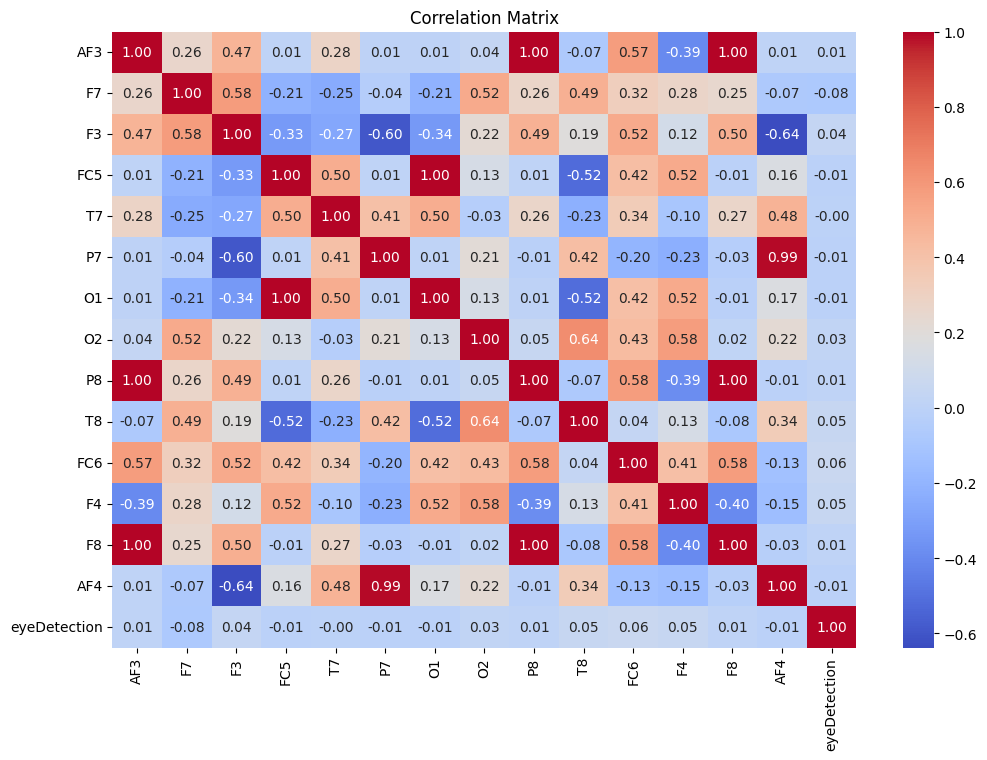

In [58]:
correlation_matrix = dataset_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [59]:
# Split dataset features and target variable
X = dataset_cleaned.drop(columns=['eyeDetection'])
y = dataset_cleaned['eyeDetection']

In [60]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()

log_reg.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

Logistic Regression Accuracy: 0.5714285714285714
Decision Tree Accuracy: 0.8444592790387183
Random Forest Accuracy: 0.9235647530040053
SVM Accuracy: 0.613150867823765


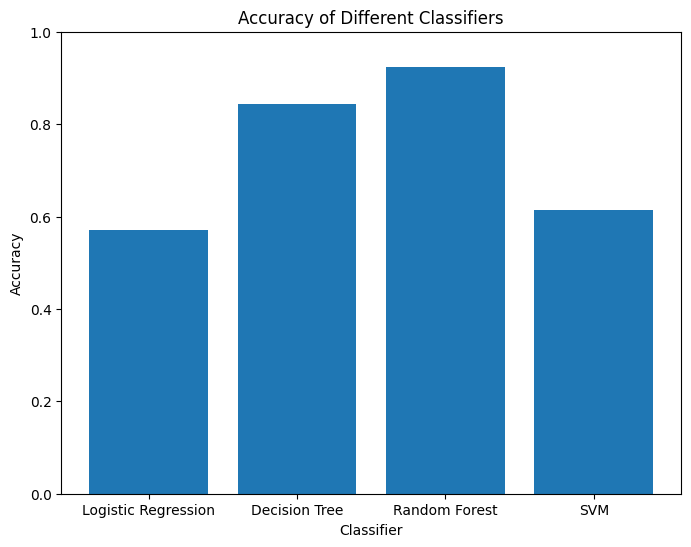

In [62]:
log_reg_pred = log_reg.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)

log_reg_acc = accuracy_score(y_test, log_reg_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)

random_seed = 42

print("Logistic Regression Accuracy:", log_reg_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

# Plot models
models = {
    "Logistic Regression": log_reg_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc
}

plt.figure(figsize=(8, 6))
plt.bar(models.keys(), models.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)
plt.show()

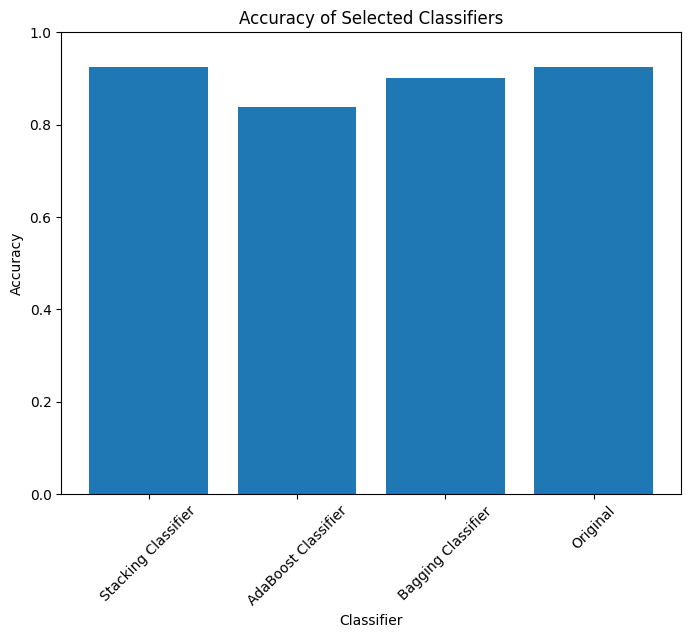


Summary of Model Accuracies:
Top Performing Model: Stacking Classifier
Original: 0.9235647530040053
Stacking Classifier Accuracy: 0.9248998664886515
AdaBoost Classifier Accuracy: 0.8384512683578104
Bagging Classifier Accuracy: 0.8998664886515354


In [63]:
simplefilter(action='ignore', category=FutureWarning)

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=random_seed)

bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=random_seed)

stacking_classifier.fit(X_train, y_train)

ada_boost_classifier.fit(X_train, y_train)

bagging_classifier.fit(X_train, y_train)

stacking_pred = stacking_classifier.predict(X_test)
ada_boost_pred = ada_boost_classifier.predict(X_test)
bagging_pred = bagging_classifier.predict(X_test)

stacking_acc = accuracy_score(y_test, stacking_pred)
ada_boost_acc = accuracy_score(y_test, ada_boost_pred)
bagging_acc = accuracy_score(y_test, bagging_pred)
highest_acc_original = max([log_reg_acc, dt_acc, rf_acc, svm_acc])

models.update({
    "Stacking Classifier": stacking_acc,
    "AdaBoost Classifier": ada_boost_acc,
    "Bagging Classifier": bagging_acc,
    "Original": highest_acc_original
})

selected_models = {
    "Stacking Classifier": stacking_acc,
    "AdaBoost Classifier": ada_boost_acc,
    "Bagging Classifier": bagging_acc,
    "Original": highest_acc_original
}

plt.figure(figsize=(8, 6))
plt.bar(selected_models.keys(), selected_models.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Selected Classifiers')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\nSummary of Model Accuracies:")
print("Top Performing Model:", max(models, key=models.get))
print("Original:", highest_acc_original)
print("Stacking Classifier Accuracy:", stacking_acc)
print("AdaBoost Classifier Accuracy:", ada_boost_acc)
print("Bagging Classifier Accuracy:", bagging_acc)
